# cdasws Binning Example Jupyter Notebook
This [Jupyter notebook](https://jupyter.org) demonstrates using the [cdasws](https://pypi.org/project/cdasws) Python package to retrieve data from two [cdaweb](https://cdaweb.gsfc.nasa.gov) datasets that have different timestamps and places the data on the same time grid (with optional spike removal).  The data is returned in the [SpacePy data model](https://spacepy.github.io/datamodel.html).  The [AC_H0_SWE](/misc/NotesA.html#AC_H0_SWE) and [AC_H2_SWE](/misc/NotesA.html#AC_H2_SWE) datasets are used in this example.  For more information on binning, see [binning in cdaweb](/CDAWeb_Binning_readme.html).

This notebook contains the following sections:

1. [Prerequisites](#Prerequisites)
2. [Setup](#Setup)
3. [Display Original Data](#Display-Original-Data)
4. [Get Binned Data](#Get-Binned-Data)
5. [Compare Data](#Compare-Data)
6. [Additional Documentation](#Additional-Documentation)

## Prerequisites
Install the prerequisite software the [Python Package Index](https://pypi.org/).

1. pip install spacepy
1. pip install cdasws

## Setup
Execute some preliminary code that is necessary before the code that follows.

In [9]:
from cdasws import CdasWs

import matplotlib.pyplot as plt
    
cdas = CdasWs()

## Display Original Data
The following code gets and displays the original, unbinned data.

In [10]:
dataset0 = 'AC_H0_SWE'
parameters = ['Np']
start = '1998-02-04T00:00:00Z'
stop = '1998-02-06T00:00:00Z'
status, data0 = cdas.get_data(dataset0, parameters, start, stop)
print(f'{dataset0}')
print(data0)
dataset1 = 'AC_H2_SWE'
status, data1 = cdas.get_data(dataset1, parameters, start, stop)
print()
print(f'{dataset1}')
print(data1)

AC_H0_SWE
{'Epoch': VarCopy([datetime.datetime(1998, 2, 4, 0, 0, 31),
         datetime.datetime(1998, 2, 4, 0, 1, 35),
         datetime.datetime(1998, 2, 4, 0, 2, 39), ...,
         datetime.datetime(1998, 2, 5, 23, 57, 19),
         datetime.datetime(1998, 2, 5, 23, 58, 23),
         datetime.datetime(1998, 2, 5, 23, 59, 27)], dtype=object), 'Np': VarCopy([-1.00000e+31, -1.00000e+31, -1.00000e+31, ...,  1.44819e+01,
          1.49483e+01,  1.35783e+01], dtype=float32)}

AC_H2_SWE
{'Epoch': VarCopy([datetime.datetime(1998, 2, 4, 0, 0),
         datetime.datetime(1998, 2, 4, 1, 0),
         datetime.datetime(1998, 2, 4, 2, 0),
         datetime.datetime(1998, 2, 4, 3, 0),
         datetime.datetime(1998, 2, 4, 4, 0),
         datetime.datetime(1998, 2, 4, 5, 0),
         datetime.datetime(1998, 2, 4, 6, 0),
         datetime.datetime(1998, 2, 4, 7, 0),
         datetime.datetime(1998, 2, 4, 8, 0),
         datetime.datetime(1998, 2, 4, 9, 0),
         datetime.datetime(1998, 2, 4, 10,

## Get Binned Data
The following code gets data after it has been binned with 60 second time intervals and any missing values created by interpolation.

In [11]:
binData = {
    'interval': 60.0,
    'interpolateMissingValues': True,
    'sigmaMultiplier': 4
}
status, data0 = cdas.get_data(dataset0, parameters, start, stop, binData=binData)
print(f'{dataset0}')
print(data0)
status, data1 = cdas.get_data(dataset1, parameters, start, stop, binData=binData)
print()
print(f'{dataset1}')
print(data1)

AC_H0_SWE
{'Epoch_bin': VarCopy([datetime.datetime(1998, 2, 4, 0, 0, 30),
         datetime.datetime(1998, 2, 4, 0, 1, 30),
         datetime.datetime(1998, 2, 4, 0, 2, 30), ...,
         datetime.datetime(1998, 2, 5, 23, 57, 30),
         datetime.datetime(1998, 2, 5, 23, 58, 30),
         datetime.datetime(1998, 2, 5, 23, 59, 30)], dtype=object), 'Epoch': VarCopy([datetime.datetime(1998, 2, 4, 0, 0, 31),
         datetime.datetime(1998, 2, 4, 0, 1, 35),
         datetime.datetime(1998, 2, 4, 0, 2, 39), ...,
         datetime.datetime(1998, 2, 5, 23, 57, 19),
         datetime.datetime(1998, 2, 5, 23, 58, 23),
         datetime.datetime(1998, 2, 5, 23, 59, 27)], dtype=object), 'Np': VarCopy([16.3343, 16.3343, 16.3343, ..., 14.4819, 14.9483, 13.5783],
        dtype=float32), 'NP_NBIN': VarCopy([-0., -0., -0., ...,  1.,  1.,  1.], dtype=float32), 'NP_BIN_DELTA_MINUS_VAR': VarCopy([-1.e+31, -1.e+31, -1.e+31, ..., -1.e+31, -1.e+31, -1.e+31],
        dtype=float32), 'NP_BIN_DELTA_PLUS_VAR'

## Compare Data
The following code compares the binned data from the two datasets by plotting the values.

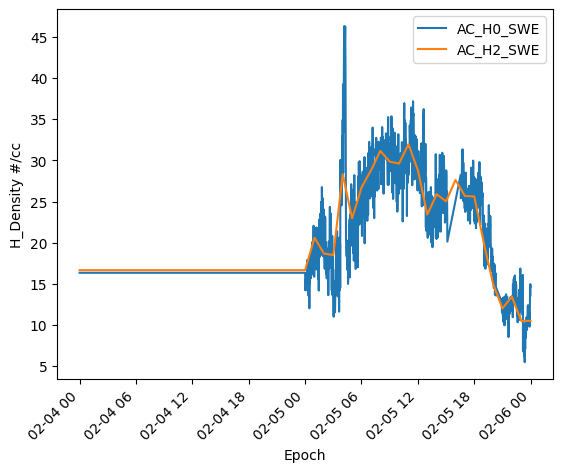

In [13]:
plt.plot(data0['Epoch_bin'], data0['Np'])
plt.plot(data1['Epoch_bin'], data1['Np'])
plt.xlabel(data0['Epoch'].attrs['LABLAXIS'])
plt.xticks(rotation=45, ha='right')
plt.ylabel(data0['Np'].attrs['LABLAXIS'] + ' ' +
           data0['Np'].attrs['UNITS'])
plt.legend([dataset0, dataset1])
plt.show()

## Additional Documentation

View the [cdasws API](https://cdaweb.gsfc.nasa.gov/WebServices/REST/py/cdasws/) for additional functions.  Additional [notebook examples](https://cdaweb.gsfc.nasa.gov/WebServices/REST/#Jupyter_Notebook_Examples) are also available.